# Importing modules

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# Introduction to regression

## Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

* An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.
* A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.
* A restaurant using review data to ascribe positive or negative sentiment to a given review.
* __A bike share company using time and weather data to predict the number of bikes being rented at any given hour.__


Great work! The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem.

## Importing data for supervised learning

In this chapter, you will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

Note that using -1 as a reshape dimension sets that dimension to adjust to whatever the other dimensions imply. If you have a 2x10x10 3D array, you can reshape as 5x5x8 or just as 5x5x-1, and the -1 will automatically populate as 8, as this is the required dimension for 200 datapoints.  

* [.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)

In [52]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv', index_col=0)

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)   # extracts the values of gapminder 'life' as a single column
X = X.reshape(-1, 1)   # extracts the values of gapminder 'fertility' as a single column

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Great work! Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

## Exploring the Gapminder data

As always, it is important to explore your data before building models. Here, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset.

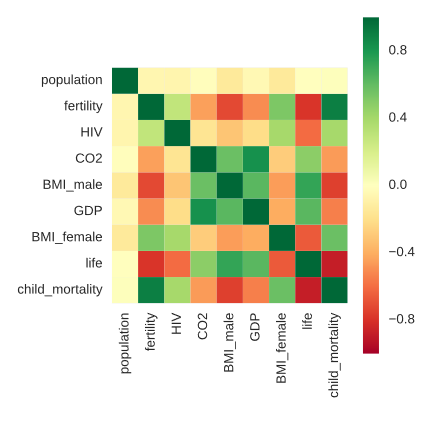


Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

    sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!

* [Seaborn's heatmap function](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [53]:
print(df.info())
print()
print(df.describe())
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 9 columns):
BMI_female         139 non-null float64
BMI_male           139 non-null float64
CO2                139 non-null float64
GDP                139 non-null float64
HIV                139 non-null float64
child_mortality    139 non-null float64
fertility          139 non-null float64
life               139 non-null float64
population         139 non-null float64
dtypes: float64(9)
memory usage: 10.9 KB
None

       BMI_female    BMI_male         CO2            GDP         HIV  \
count  139.000000  139.000000  139.000000     139.000000  139.000000   
mean   126.701914   24.623054    4.459874   16638.784173    1.915612   
std      4.471997    2.209368    6.268349   19207.299083    4.408974   
min    117.375500   20.397420    0.008618     588.000000    0.060000   
25%    123.232200   22.448135    0.496190    2899.000000    0.100000   
50%    126.519600   25.156990    2.223796    9938.000000 

Possible Answers

* The DataFrame has 139 samples (or rows) and 9 columns.
* life and fertility are negatively correlated.
* The mean of life is 69.602878.
* __fertility is of type int64.__
* GDP and life are positively correlated.

Good job! As seen by using df.info(), fertility, along with all the other columns, is of type float64, not int64.

# The basics of linear regression

## Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R<sup>2</sup> score using sckit-learn's .score() method.

* [linear_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* [.predict()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)

In [54]:
X_fertility = np.array([[ 2.73], [ 6.43], [ 2.24], [ 1.4 ], [ 1.96], [ 1.41], [ 1.99], [ 1.89], [ 2.38], [ 1.83], [ 1.42], [ 1.82], [ 2.91], [ 5.27], [ 2.51], [ 3.48], [ 2.86], [ 1.9 ], [ 1.43], [ 6.04], [ 6.48], [ 3.05], [ 5.17], [ 1.68], [ 6.81], [ 1.89], [ 2.43], [ 5.05], [ 5.1 ], [ 1.91], [ 4.91], [ 1.43], [ 1.5 ], [ 1.89], [ 3.76], [ 2.73], [ 2.95], [ 2.32], [ 5.31], [ 5.16], [ 1.62], [ 2.74], [ 1.85], [ 1.97], [ 4.28], [ 5.8 ], [ 1.79], [ 1.37], [ 4.19], [ 1.46], [ 4.12], [ 5.34], [ 5.25], [ 2.74], [ 3.5 ], [ 3.27], [ 1.33], [ 2.12], [ 2.64], [ 2.48], [ 1.88], [ 2. ], [ 2.92], [ 1.39], [ 2.39], [ 1.34], [ 2.51], [ 4.76], [ 1.5 ], [ 1.57], [ 3.34], [ 5.19], [ 1.42], [ 1.63], [ 4.79], [ 5.78], [ 2.05], [ 2.38], [ 6.82], [ 1.38], [ 4.94], [ 1.58], [ 2.35], [ 1.49], [ 2.37], [ 2.44], [ 5.54], [ 2.05], [ 2.9 ], [ 1.77], [ 2.12], [ 2.72], [ 7.59], [ 6.02], [ 1.96], [ 2.89], [ 3.58], [ 2.61], [ 4.07], [ 3.06], [ 2.58], [ 3.26], [ 1.33], [ 1.36], [ 2.2 ], [ 1.34], [ 1.49], [ 5.06], [ 5.11], [ 1.41], [ 5.13], [ 1.28], [ 1.31], [ 1.43], [ 7.06], [ 2.54], [ 1.42], [ 2.32], [ 4.79], [ 2.41], [ 3.7 ], [ 1.92], [ 1.47], [ 3.7 ], [ 5.54], [ 1.48], [ 4.88], [ 1.8 ], [ 2.04], [ 2.15], [ 6.34], [ 1.38], [ 1.87], [ 2.07], [ 2.11], [ 2.46], [ 1.86], [ 5.88], [ 3.85]])
Y = np.array([[ 75.3], [ 58.3], [ 75.5], [ 72.5], [ 81.5], [ 80.4], [ 70.6], [ 72.2], [ 68.4], [ 75.3], [ 70.1], [ 79.4], [ 70.7], [ 63.2], [ 67.6], [ 70.9], [ 61.2], [ 73.9], [ 73.2], [ 59.4], [ 57.4], [ 66.2], [ 56.6], [ 80.7], [ 54.8], [ 78.9], [ 75.1], [ 62.6], [ 58.6], [ 79.7], [ 55.9], [ 76.5], [ 77.8], [ 78.7], [ 61. ], [ 74. ], [ 70.1], [ 74.1], [ 56.7], [ 60.4], [ 74. ], [ 65.7], [ 79.4], [ 81. ], [ 57.5], [ 62.2], [ 72.1], [ 80. ], [ 62.7], [ 79.5], [ 70.8], [ 58.3], [ 51.3], [ 63. ], [ 61.7], [ 70.9], [ 73.8], [ 82. ], [ 64.4], [ 69.5], [ 76.9], [ 79.4], [ 80.9], [ 81.4], [ 75.5], [ 82.6], [ 66.1], [ 61.5], [ 72.3], [ 77.6], [ 45.2], [ 61. ], [ 72. ], [ 80.7], [ 63.4], [ 51.4], [ 74.5], [ 78.2], [ 55.8], [ 81.4], [ 63.6], [ 72.1], [ 75.7], [ 69.6], [ 63.2], [ 73.3], [ 55. ], [ 60.8], [ 68.6], [ 80.3], [ 80.2], [ 75.2], [ 59.7], [ 58. ], [ 80.7], [ 74.6], [ 64.1], [ 77.1], [ 58.2], [ 73.6], [ 76.8], [ 69.4], [ 75.3], [ 79.2], [ 80.4], [ 73.4], [ 67.6], [ 62.2], [ 64.3], [ 76.4], [ 55.9], [ 80.9], [ 74.8], [ 78.5], [ 56.7], [ 55. ], [ 81.1], [ 74.3], [ 67.4], [ 69.1], [ 46.1], [ 81.1], [ 81.9], [ 69.5], [ 59.7], [ 74.1], [ 60. ], [ 71.3], [ 76.5], [ 75.1], [ 57.2], [ 68.2], [ 79.5], [ 78.2], [ 76. ], [ 68.7], [ 75.4], [ 52. ], [ 49. ]])

R-squared: 0.619244216774


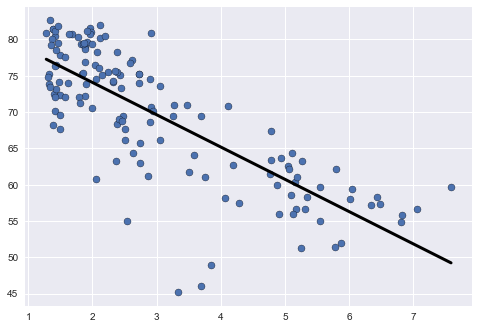

In [55]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R-squared:",reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, edgecolor='k')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

Fantastic! Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

## Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R<sup>2</sup> score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X is the whole dataframe (with the target variable, life expectancy, dropped) 

* [mean_squared_error()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [np.sqrt()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sqrt.html)

In [56]:
# Import necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop('life', axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731497019
Root Mean Squared Error: 3.247601079969883


Excellent! Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the next video!

# Cross-validation

## 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R<sup>2</sup> as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

* [cross_val_Score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [57]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]
Average 5-Fold CV Score: 0.8599627722458447


Great work! Now that you have cross-validated your model, you can more confidently evaluate its predictions.

## K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)

* [%timeit](https://docs.python.org/3/library/timeit.html)

In [58]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.871871278236
0.843612861872


In [59]:
%timeit cross_val_score(reg, X, y, cv = 3)

100 loops, best of 3: 3.69 ms per loop


In [60]:
%timeit cross_val_score(reg, X, y, cv = 10)

100 loops, best of 3: 12.6 ms per loop


# Regularized regression

OLS is the process of minimizing a loss function to get a coefficient, a<sub>i</sub>, for each feature variable. But with lots of coefficients, a model runs the risk of fitting the noise rather than the patterns of the data. It will fit the sample very well, but might be terrible at predicting when it comes to new data. Allowing a model to have multiple features or very high value features can therefore lead to overfitting. 

Regularizing a regression is the process of penalizing multiple and high coefficients. It amends the loss function that is to be minimized by accounting for the number and size of the coefficients on each independent variable. 

Also, with many independent variables / features, a model has greater risk of suffering from multicollinearity. This will lead to high variance. Removing this might increase bias, but at the gain of lower variance. Regularizing regressions is a way of highlighting the most important variables and therefore indicating which ones to drop. 

## Regularization I: Lasso

In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

Lasso (Least Absolute Shrinkage Selector Operator) regression minimises the absolute error function. The loss function that is minimized in lasso regression is:

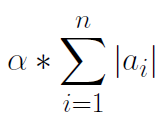

Where α is alpha (sometimes called lambda), a parameter we need to choose. The choice of alpha affects the model and is similar to choosing k in k-NN. An alpha of zero returns OLS. A low alpha can lead to overfitting. A very high alpha can lead to underfitting. Alpha controls model complexity and choosing Alpha is part of 'hyperparameter tuning', which will be dealt with in the next module. 

Lasso regression tends to shrink the less important independent variables of a model to 0, while emphasising the more important ones. This can allow you to report important results to non technical colleagues. 

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

* [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [lasso.fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso.fit)

In [61]:
X = pd.read_csv('X.csv', index_col=0)
Y = np.array([ 75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1, 79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2, 56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8, 78.7, 61., 74., 70.1, 74.1, 56.7, 60.4, 74., 65.7, 79.4, 81., 57.5, 62.2, 72.1, 80., 62.7, 79.5, 70.8, 58.3, 51.3, 63., 61.7, 70.9, 73.8, 82., 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6, 66.1, 61.5, 72.3, 77.6, 45.2, 61., 72., 80.7, 63.4, 51.4, 74.5, 78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55., 60.8, 68.6, 80.3, 80.2, 75.2, 59.7, 58., 80.7, 74.6, 64.1, 77.1, 58.2, 73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4, 55.9, 80.9, 74.8, 78.5, 56.7, 55., 81.1, 74.3, 67.4, 69.1, 46.1, 81.1, 81.9, 69.5, 59.7, 74.1, 60., 71.3, 76.5, 75.1, 57.2, 68.2, 79.5, 78.2, 76., 68.7, 75.4, 52., 49. ])
df_columns = pd.Series(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality'])

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


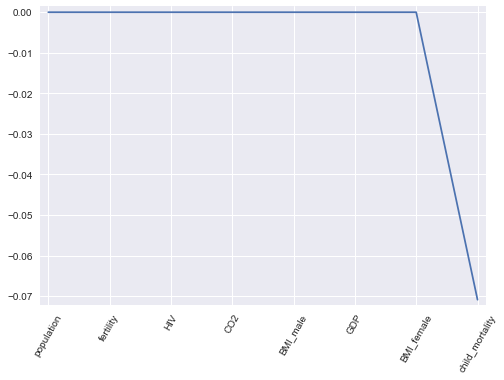

In [62]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Great work! According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy

## Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

The formula for Ridge is

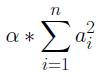

Notice that for ridge regression, the observations are squared rather than taken as absolute values. Large coefficients are penalized more than in lasso regression. A high alpha means that large coefficients are penalised more heavily. 

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as __L1__ regularization because the regularization term is the __L1__ norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the __L2__ norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated __R<sup>2</sup>__ scores for each, using this 'display_plot' function that we have defined for you, which plots the __R<sup>2</sup>__ score as well as standard error for each alpha.

Don't worry about the specifics of the below 'display_plot' function works. The motivation behind this exercise is for you to see how the __R<sup>2</sup>__ score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

* [np.logspace()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.logspace.html)

In [64]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

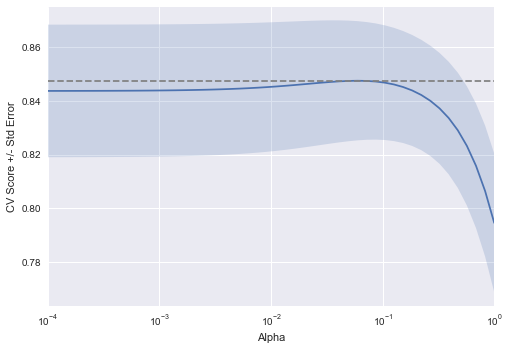

In [65]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Great work! Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!

## Appendix: Methods
* [.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)
* [linear_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* [.predict()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)
* [mean_squared_error()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [np.sqrt()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sqrt.html)
* [cross_val_Score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
* [%timeit](https://docs.python.org/3/library/timeit.html)
* [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [lasso.fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso.fit)
* [np.logspace()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.logspace.html)
